# Bike Share Data
### Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles on a very short-term basis for a price. This allows people to borrow a bike from point A and return it at point B, though they can also return it to the same location if they'd like to just go for a ride. Regardless, each bike can serve several users per day.

### Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

### In this project, you will use data provided by Motivate, a bike share system provider for many major cities in the United States, to uncover bike share usage patterns. You will compare the system usage between three large cities: Chicago, New York City, and Washington, DC.

## We want to know many thing about this data
### First: Popular times of travel
### Second: Popular stations and trip
### Third : User info

so Let's start our journey

## We have three data set from 3 different cities: New york,chicago and washington
#### Put the name of the city that you want to explore it

In [3]:
CITY_DATA = {
    'chicago' : 'chicago.csv',
    'new york city' : 'new_york_city.csv',
    'washington' : 'washington.csv'
}

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
def load(city):
    df = pd.read_csv(CITY_DATA[city])
    return df.head()

load('chicago')

,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992.0
1,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992.0
2,9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981.0
3,304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986.0
4,45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     300000 non-null  int64  
 1   Start Time     300000 non-null  object 
 2   End Time       300000 non-null  object 
 3   Trip Duration  300000 non-null  int64  
 4   Start Station  300000 non-null  object 
 5   End Station    300000 non-null  object 
 6   User Type      300000 non-null  object 
 7   Gender         238948 non-null  object 
 8   Birth Year     238981 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 20.6+ MB


#### We have missing values in Gender and Birth year

In [9]:
df.describe()

,Unnamed: 0,Trip Duration,Birth Year
count,3.000000e+05,300000.000000,238981.000000
mean,7.763458e+05,936.239290,1980.858223
std,4.481464e+05,1548.792767,11.003329
min,4.000000e+00,60.000000,1899.000000
25%,3.871368e+05,393.000000,1975.000000
50%,7.771035e+05,670.000000,1984.000000
75%,1.164065e+06,1125.000000,1989.000000
max,1.551500e+06,86224.000000,2016.000000


In [11]:
df.rename(columns = lambda x : x.strip().lower().replace(" ","_"), inplace = True)
df.head()

,unnamed:_0,start_time,end_time,trip_duration,start_station,end_station,user_type,gender,birth_year
0,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992.0
1,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992.0
2,9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981.0
3,304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986.0
4,45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975.0


In [12]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['month'] = df['start_time'].dt.month_name()
df['days_of_week'] = df['start_time'].dt.day_name()

df.head()

,unnamed:_0,start_time,end_time,trip_duration,start_station,end_station,user_type,gender,birth_year,month,days_of_week
0,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992.0,June,Friday
1,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992.0,May,Thursday
2,9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981.0,January,Wednesday
3,304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986.0,March,Monday
4,45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975.0,January,Tuesday


## Now, Let's see the popular time travel according to:
### 1- most common month
### 2- most common day of week
### 3- most common hour of day

## First : Most common month

In [37]:
df['month'].mode()[0]

'June'

#### The most common month for travelling was in June

## Second: Most common day of week

In [14]:
df['days_of_week'].mode()[0]

'Tuesday'

#### The most common day of week was in Tuesday

## Third: Most common hour of day

In [16]:
df['hour'] = df['start_time'].dt.hour

df['hour'].mode()[0]

17

#### Most common hour of day was at 5 PM

## After exploring the Popular time for travelling we want to know the Popular stations and trip according to
### 1 - most common start station
### 2- most common end station
### 3- most common trip from start to end

## First: Most common Start station

In [17]:
df['start_station'].mode()[0]

'Streeter Dr & Grand Ave'

#### The most common start station was Streeter Dr & Grand Ave


## Second: Most common End station

In [18]:
df['end_station'].mode()[0]

'Streeter Dr & Grand Ave'

#### Again! the most common end station was Streeter Dr & Grand Ave

## Third: Most common trip from start to end

In [20]:
popularTrip = df['start_station'] + ' to ' + df['end_station']
popularTrip.mode()[0]

'Lake Shore Dr & Monroe St to Streeter Dr & Grand Ave'

#### The most common trip was from (Lake Shore Dr & Monroe St) to (Streeter Dr & Grand Ave)

## Finally: Let's explore about user info

### All the dataset have Gender column and Birth year column except (washington dataset)

In [35]:
def userInfo(city):
    if city == 'washington':
        return df['user_type'].value_counts()
        print('-' *20)
        print('No more Info')
    else:
        
        print(df['user_type'].value_counts())
        print("-"*20)
        print(df['gender'].value_counts())
        print("-"*20)
        year = df['birth_year'].fillna(1899).astype('int64')
        return "The earliest year of birth is {}, The most recent year of birth is {}, the most common year of birth is {}". format(year.min(),year.max(),year.mode()[0])
userInfo('chicago') 

Subscriber    238889
Customer       61110
Dependent          1
Name: user_type, dtype: int64
--------------------
Male      181190
Female     57758
Name: gender, dtype: int64
--------------------


'The earliest year of birth is 1899, The most recent year of birth is 2016, the most common year of birth is 1899'

## Now we can put some visualitaztion to show us more information

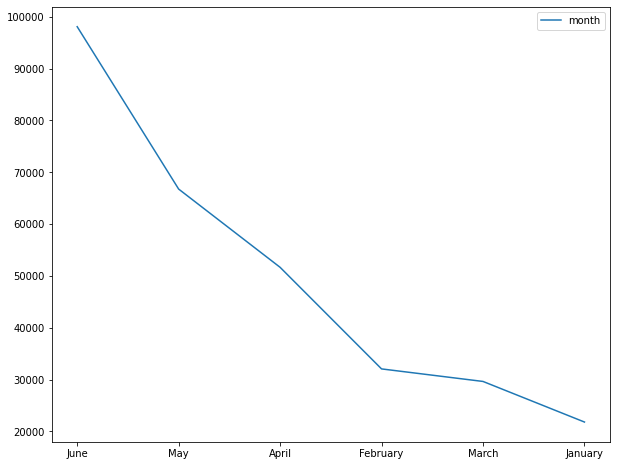

In [66]:
plt.figure(figsize = [10,8])
df['month'].value_counts().plot()
plt.legend()
plt.show();

#### We can see that the clients increase in loaing by increasing the months

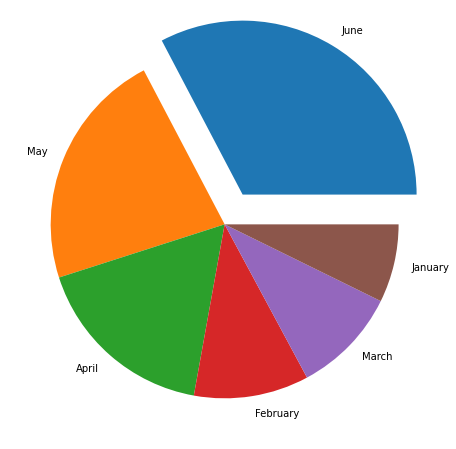

In [67]:
plt.figure(figsize = [10,8])
myexplode = [0.2, 0, 0, 0, 0, 0]
months = df['month'].value_counts()
plt.pie(months, labels = months.index, explode = myexplode)
plt.show()

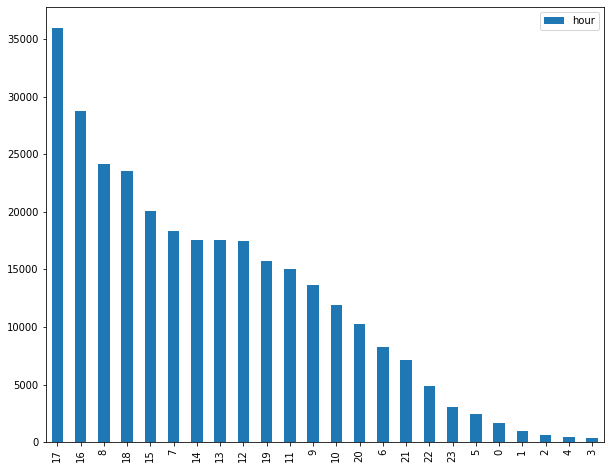

In [74]:
plt.figure(figsize = [10,8])
df['hour'].value_counts().plot(kind = 'bar')
plt.legend()
plt.show()

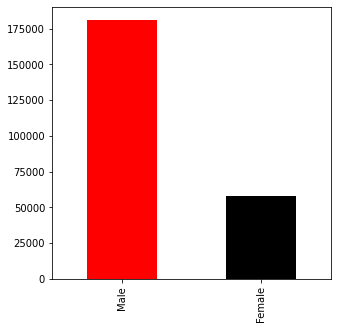

In [98]:
plt.figure(figsize = [5,5])
colors = ['red', 'black']
df['gender'].value_counts().plot(kind = 'bar', color = colors)
plt.show()